In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit
from astropy import constants as const
from astropy import units as u

In [21]:
df = pd.read_csv("solar_system.csv")
print ("Shape before: ", df.shape)

Shape before:  (20, 11)


In [22]:
df = df.set_index("Attribute").T

df.index.name = "Planet"

df.reset_index(inplace=True)

df.columns.name = None
print ("Shape after: ", df.shape)


Shape after:  (10, 21)


In [23]:
print ("20 rows, 11 columns before")
print ("10 rows, 21 columns after")

20 rows, 11 columns before
10 rows, 21 columns after


In [25]:
print ("Line 1 makes the 'Attribute' column the index. Then it transposes the dataframe so that each planet becomes a row and each attribute becomes a column with .T ")
print ("Line 2 renams the index to Planet")
print ("Line 3 makes 'Planet' into a regualr column and resets the index")
print ("Line 4 removes the name of the column axis which would have been 'Attribute'")

Line 1 makes the 'Attribute' column the index. Then it transposes the dataframe so that each planet becomes a row and each attribute becomes a column with .T 
Line 2 renams the index to Planet
Line 3 makes 'Planet' into a regualr column and resets the index
Line 4 removes the name of the column axis which would have been 'Attribute'


In [27]:
print ("After transposing, the index 'Planet' gets turned into a regualr column and resets the index")
print ("New column names: \n", df.columns)

After transposing, the index 'Planet' gets turned into a regualr column and resets the index
New column names: 
 Index(['Planet', 'Mass (10^24kg)', 'Diameter (km)', 'Density (kg/m^3)',
       'Gravity (m/s^2)', 'Escape Velocity (km/s)', 'Rotation Period (hours)',
       'Length of Day (hours)', 'Distance from Sun (10^6 km)',
       'Perihelion (10^6 km)', 'Aphelion (10^6 km)', 'Orbital Period (days)',
       'Orbital Velocity (km/s)', 'Orbital Inclination (deg)',
       'Orbital Eccentricity', 'Obliquity to Orbit (deg)',
       'Mean Temperature (C)', 'Surface Pressure (bars)', 'Number of Moons',
       'Ring System?', 'Global Magnetic Field?'],
      dtype='object')


In [29]:
column_with_unit = [col for col in df.columns if "(" in col and ")" in col]
column_without_unit = [col for col in df.columns if  col not in column_with_unit]

print("Columns with units:", len(column_with_unit))
print(column_with_unit)

print("\nColumns without units:", len(column_without_unit))
print(column_without_unit)


Columns with units: 16
['Mass (10^24kg)', 'Diameter (km)', 'Density (kg/m^3)', 'Gravity (m/s^2)', 'Escape Velocity (km/s)', 'Rotation Period (hours)', 'Length of Day (hours)', 'Distance from Sun (10^6 km)', 'Perihelion (10^6 km)', 'Aphelion (10^6 km)', 'Orbital Period (days)', 'Orbital Velocity (km/s)', 'Orbital Inclination (deg)', 'Obliquity to Orbit (deg)', 'Mean Temperature (C)', 'Surface Pressure (bars)']

Columns without units: 5
['Planet', 'Orbital Eccentricity', 'Number of Moons', 'Ring System?', 'Global Magnetic Field?']


In [30]:
df

,Planet,Mass (10^24kg),Diameter (km),Density (kg/m^3),Gravity (m/s^2),Escape Velocity (km/s),Rotation Period (hours),Length of Day (hours),Distance from Sun (10^6 km),Perihelion (10^6 km),...,Orbital Period (days),Orbital Velocity (km/s),Orbital Inclination (deg),Orbital Eccentricity,Obliquity to Orbit (deg),Mean Temperature (C),Surface Pressure (bars),Number of Moons,Ring System?,Global Magnetic Field?
0,Mercury,0.330,4879,5429,3.7,4.3,1407.6,4222.6,57.9,46.0,...,88.0,47.4,7.0,0.206,0.034,167,0,0,No,Yes
1,Venus,4.87,12104,5243,8.9,10.4,-5832.5,2802.0,108.2,107.5,...,224.7,35.0,3.4,0.007,177.4,464,92,0,No,No
2,Earth,5.97,12756,5514,9.8,11.2,23.9,24.0,149.6,147.1,...,365.2,29.8,0.0,0.017,23.4,15,1,1,No,Yes
3,Moon,0.073,3475,3340,1.6,2.4,655.7,708.7,0.384,0.363,...,27.3,1.0,5.1,0.055,6.7,-20,0,0,No,No
4,Mars,0.642,6792,3934,3.7,5.0,24.6,24.7,228.0,206.7,...,687.0,24.1,1.8,0.094,25.2,-65,0.01,2,No,No
5,Jupiter,1898,142984,1326,23.1,59.5,9.9,9.9,778.5,740.6,...,4331,13.1,1.3,0.049,3.1,-110,Unknown,95,Yes,Yes
6,Saturn,568,120536,687,9.0,35.5,10.7,10.7,1432.0,1357.6,...,10747,9.7,2.5,0.052,26.7,-140,Unknown,274,Yes,Yes
7,Uranus,86.8,51118,1270,8.7,21.3,-17.2,17.2,2867.0,2732.7,...,30589,6.8,0.8,0.047,97.8,-195,Unknown,28,Yes,Yes
8,Neptune,102,49528,1638,11.0,23.5,16.1,16.1,4515.0,4471.1,...,59800,5.4,1.8,0.010,28.3,-200,Unknown,16,Yes,Yes
9,Pluto,0.0130,2376,1850,0.7,1.3,-153.3,153.3,5906.4,4436.8,...,90560,4.7,17.2,0.244,119.5,-225,0.00001,5,No,Unknown


# 2.1.2

In [32]:
df.dtypes

Planet                         object
Mass (10^24kg)                 object
Diameter (km)                  object
Density (kg/m^3)               object
Gravity (m/s^2)                object
Escape Velocity (km/s)         object
Rotation Period (hours)        object
Length of Day (hours)          object
Distance from Sun (10^6 km)    object
Perihelion (10^6 km)           object
Aphelion (10^6 km)             object
Orbital Period (days)          object
Orbital Velocity (km/s)        object
Orbital Inclination (deg)      object
Orbital Eccentricity           object
Obliquity to Orbit (deg)       object
Mean Temperature (C)           object
Surface Pressure (bars)        object
Number of Moons                object
Ring System?                   object
Global Magnetic Field?         object
dtype: object

In [38]:
for col in df.columns:
    print(col)
    print(df[col].apply(type).unique(),  "\n" )

Planet
[<class 'str'>] 

Mass (10^24kg)
[<class 'str'>] 

Diameter (km)
[<class 'str'>] 

Density (kg/m^3)
[<class 'str'>] 

Gravity (m/s^2)
[<class 'str'>] 

Escape Velocity (km/s)
[<class 'str'>] 

Rotation Period (hours)
[<class 'str'>] 

Length of Day (hours)
[<class 'str'>] 

Distance from Sun (10^6 km)
[<class 'str'>] 

Perihelion (10^6 km)
[<class 'str'>] 

Aphelion (10^6 km)
[<class 'str'>] 

Orbital Period (days)
[<class 'str'>] 

Orbital Velocity (km/s)
[<class 'str'>] 

Orbital Inclination (deg)
[<class 'str'>] 

Orbital Eccentricity
[<class 'str'>] 

Obliquity to Orbit (deg)
[<class 'str'>] 

Mean Temperature (C)
[<class 'str'>] 

Surface Pressure (bars)
[<class 'str'>] 

Number of Moons
[<class 'str'>] 

Ring System?
[<class 'str'>] 

Global Magnetic Field?
[<class 'str'>] 



In [39]:
print ("The actual values are strings in every column, even when they look like numbers")
print ("It is a problem cause you can't do mathematical operations on strings")

The actual values are strings in every column, even when they look like numbers
It is a problem cause you can't do mathematical operations on strings


# 2.1.3

In [50]:
for col in df.columns:
    if (col == "Planet" or col == "Ring System?" or col == "Global Magnetic Field?"):
        continue
    else:
        df[col] = pd.to_numeric(df[col], errors="coerce")


In [62]:
df.dtypes

Planet                          object
Mass (kg)                       object
Diameter (km)                    int64
Density (kg/m^3)                 int64
Gravity (m/s^2)                float64
Escape Velocity (km/s)         float64
Rotation Period (hours)        float64
Length of Day (hours)          float64
Distance from Sun (10^6 km)    float64
Perihelion (10^6 km)           float64
Aphelion (10^6 km)             float64
Orbital Period (days)          float64
Orbital Velocity (km/s)        float64
Orbital Inclination (deg)      float64
Orbital Eccentricity           float64
Obliquity to Orbit (deg)       float64
Mean Temperature (C)             int64
Surface Pressure (bars)        float64
Number of Moons                  int64
Ring System?                    object
Global Magnetic Field?          object
dtype: object

In [52]:
#3:

print ("object - A general purpose data type that can hold any python object \n float64 - A 64 bit floating point number \n int64 - A 64 bit integer. ")

print ("The columns 'Planet', 'Ring System?' and 'Global Magnetic Field?' are still objects as they contain text which cannot be converted to numbers.")

object - A general purpose data type that can hold any python object 
 float64 - A 64 bit floating point number 
 int64 - A 64 bit integer. 
The columns 'Planet', 'Ring System?' and 'Global Magnetic Field?' are still objects as they contain text which cannot be converted to numbers.


# 2.2

In [57]:
def attach_units(col_name, unit, new_name=None):
    
    new_values = []
    for val in df[col_name]:
        new_values.append(val * unit)

    df[col_name] = new_values

   
    if new_name is not None:
        df.rename(columns={col_name: new_name}, inplace=True)


In [58]:
attach_units("Mass (10^24kg)", 1e24 * u.kg, "Mass (kg)")

In [60]:
print(df["Mass (kg)"])

0                   3.3e+23 kg
1                  4.87e+24 kg
2     5.969999999999999e+24 kg
3                   7.3e+22 kg
4                  6.42e+23 kg
5                 1.898e+27 kg
6                  5.68e+26 kg
7                  8.68e+25 kg
8    1.0199999999999999e+26 kg
9                   1.3e+22 kg
Name: Mass (kg), dtype: object


# 2.3

In [82]:

attach_units("Perihelion (10^6 km)", 1e6 * u.km, "Perihelion (km)")
attach_units("Aphelion (10^6 km)",   1e6 * u.km, "Aphelion (km)")


KeyError: 'Perihelion (10^6 km)'

In [83]:
semi_major = 0.5 * (df["Perihelion (km)"] + df["Aphelion (km)"])

col_index = df.columns.get_loc("Aphelion (km)") + 1
df.insert(col_index, "Semi-Major Axis (km)", semi_major)

In [84]:
print(df.columns) 
print(df["Semi-Major Axis (km)"])
print(type(df["Semi-Major Axis (km)"][0]))

Index(['Planet', 'Mass (kg)', 'Diameter (km)', 'Density (kg/m^3)',
       'Gravity (m/s^2)', 'Escape Velocity (km/s)', 'Rotation Period (hours)',
       'Length of Day (hours)', 'Distance from Sun (10^6 km)',
       'Perihelion (km)', 'Aphelion (km)', 'Semi-Major Axis (km)',
       'Orbital Period (days)', 'Orbital Velocity (km/s)',
       'Orbital Inclination (deg)', 'Orbital Eccentricity',
       'Obliquity to Orbit (deg)', 'Mean Temperature (C)',
       'Surface Pressure (bars)', 'Number of Moons', 'Ring System?',
       'Global Magnetic Field?'],
      dtype='object')
0      57900000.0 km
1     108200000.0 km
2     149600000.0 km
3        384500.0 km
4     228000000.0 km
5     778500000.0 km
6    1432050000.0 km
7    2867050000.0 km
8    4515000000.0 km
9    5906350000.0 km
Name: Semi-Major Axis (km), dtype: object
<class 'astropy.units.quantity.Quantity'>


In [91]:
print ("Column names: \n", df.columns)
print ("New column: \n", df["Semi-Major Axis (km)"])

Column names: 
 Index(['Planet', 'Mass (kg)', 'Diameter (km)', 'Density (kg/m^3)',
       'Gravity (m/s^2)', 'Escape Velocity (km/s)', 'Rotation Period (hours)',
       'Length of Day (hours)', 'Distance from Sun (10^6 km)',
       'Perihelion (km)', 'Aphelion (km)', 'Semi-Major Axis (km)',
       'Orbital Period (days)', 'Orbital Velocity (km/s)',
       'Orbital Inclination (deg)', 'Orbital Eccentricity',
       'Obliquity to Orbit (deg)', 'Mean Temperature (C)',
       'Surface Pressure (bars)', 'Number of Moons', 'Ring System?',
       'Global Magnetic Field?'],
      dtype='object')
New column: 
 0      57900000.0 km
1     108200000.0 km
2     149600000.0 km
3        384500.0 km
4     228000000.0 km
5     778500000.0 km
6    1432050000.0 km
7    2867050000.0 km
8    4515000000.0 km
9    5906350000.0 km
Name: Semi-Major Axis (km), dtype: object


In [109]:
#attach_units("Orbital Period (days)", u.day)



df


,Planet,Mass (kg),Diameter (km),Density (kg/m^3),Gravity (m/s^2),Escape Velocity (km/s),Rotation Period (hours),Length of Day (hours),Distance from Sun (10^6 km),Perihelion (km),...,Orbital Period (days),Orbital Velocity (km/s),Orbital Inclination (deg),Orbital Eccentricity,Obliquity to Orbit (deg),Mean Temperature (C),Surface Pressure (bars),Number of Moons,Ring System?,Global Magnetic Field?
0,Mercury,3.3e+23 kg,4879,5429,3.7,4.3,1407.6,4222.6,57.900,46000000.0 km,...,88.0 d,47.4,7.0,0.206,0.034,167,0.00000,0,No,Yes
1,Venus,4.87e+24 kg,12104,5243,8.9,10.4,-5832.5,2802.0,108.200,107500000.0 km,...,224.7 d,35.0,3.4,0.007,177.400,464,92.00000,0,No,No
2,Earth,5.969999999999999e+24 kg,12756,5514,9.8,11.2,23.9,24.0,149.600,147100000.0 km,...,365.2 d,29.8,0.0,0.017,23.400,15,1.00000,1,No,Yes
3,Moon,7.3e+22 kg,3475,3340,1.6,2.4,655.7,708.7,0.384,363000.0 km,...,27.3 d,1.0,5.1,0.055,6.700,-20,0.00000,0,No,No
4,Mars,6.42e+23 kg,6792,3934,3.7,5.0,24.6,24.7,228.000,206700000.0 km,...,687.0 d,24.1,1.8,0.094,25.200,-65,0.01000,2,No,No
5,Jupiter,1.898e+27 kg,142984,1326,23.1,59.5,9.9,9.9,778.500,740600000.0 km,...,4331.0 d,13.1,1.3,0.049,3.100,-110,NaN,95,Yes,Yes
6,Saturn,5.68e+26 kg,120536,687,9.0,35.5,10.7,10.7,1432.000,1357600000.0 km,...,10747.0 d,9.7,2.5,0.052,26.700,-140,NaN,274,Yes,Yes
7,Uranus,8.68e+25 kg,51118,1270,8.7,21.3,-17.2,17.2,2867.000,2732700000.0 km,...,30589.0 d,6.8,0.8,0.047,97.800,-195,NaN,28,Yes,Yes
8,Neptune,1.0199999999999999e+26 kg,49528,1638,11.0,23.5,16.1,16.1,4515.000,4471100000.0 km,...,59800.0 d,5.4,1.8,0.010,28.300,-200,NaN,16,Yes,Yes
9,Pluto,1.3e+22 kg,2376,1850,0.7,1.3,-153.3,153.3,5906.400,4436800000.0 km,...,90560.0 d,4.7,17.2,0.244,119.500,-225,0.00001,5,No,Unknown


In [115]:
#df["Orbital Period (years)"] = df["Orbital Period (days)"].apply(lambda x: x.to(u.year))

df

,Planet,Mass (kg),Diameter (km),Density (kg/m^3),Gravity (m/s^2),Escape Velocity (km/s),Rotation Period (hours),Length of Day (hours),Distance from Sun (10^6 km),Orbital Period (years),...,Orbital Period (days),Orbital Velocity (km/s),Orbital Inclination (deg),Orbital Eccentricity,Obliquity to Orbit (deg),Mean Temperature (C),Surface Pressure (bars),Number of Moons,Ring System?,Global Magnetic Field?
0,Mercury,3.3e+23 kg,4879,5429,3.7,4.3,1407.6,4222.6,57.900,0.24093086926762491 yr,...,88.0 d,47.4,7.0,0.206,0.034,167,0.00000,0,No,Yes
1,Venus,4.87e+24 kg,12104,5243,8.9,10.4,-5832.5,2802.0,108.200,0.6151950718685831 yr,...,224.7 d,35.0,3.4,0.007,177.400,464,92.00000,0,No,No
2,Earth,5.969999999999999e+24 kg,12756,5514,9.8,11.2,23.9,24.0,149.600,0.9998631074606433 yr,...,365.2 d,29.8,0.0,0.017,23.400,15,1.00000,1,No,Yes
3,Moon,7.3e+22 kg,3475,3340,1.6,2.4,655.7,708.7,0.384,0.07474332648870637 yr,...,27.3 d,1.0,5.1,0.055,6.700,-20,0.00000,0,No,No
4,Mars,6.42e+23 kg,6792,3934,3.7,5.0,24.6,24.7,228.000,1.8809034907597535 yr,...,687.0 d,24.1,1.8,0.094,25.200,-65,0.01000,2,No,No
5,Jupiter,1.898e+27 kg,142984,1326,23.1,59.5,9.9,9.9,778.500,11.85763175906913 yr,...,4331.0 d,13.1,1.3,0.049,3.100,-110,NaN,95,Yes,Yes
6,Saturn,5.68e+26 kg,120536,687,9.0,35.5,10.7,10.7,1432.000,29.423682409308693 yr,...,10747.0 d,9.7,2.5,0.052,26.700,-140,NaN,274,Yes,Yes
7,Uranus,8.68e+25 kg,51118,1270,8.7,21.3,-17.2,17.2,2867.000,83.74811772758385 yr,...,30589.0 d,6.8,0.8,0.047,97.800,-195,NaN,28,Yes,Yes
8,Neptune,1.0199999999999999e+26 kg,49528,1638,11.0,23.5,16.1,16.1,4515.000,163.72347707049965 yr,...,59800.0 d,5.4,1.8,0.010,28.300,-200,NaN,16,Yes,Yes
9,Pluto,1.3e+22 kg,2376,1850,0.7,1.3,-153.3,153.3,5906.400,247.93976728268308 yr,...,90560.0 d,4.7,17.2,0.244,119.500,-225,0.00001,5,No,Unknown


In [117]:
print ("Column names: \n", df.columns, "\n")
print ("Orbital period: \n", df["Orbital Period (years)"])

Column names: 
 Index(['Planet', 'Mass (kg)', 'Diameter (km)', 'Density (kg/m^3)',
       'Gravity (m/s^2)', 'Escape Velocity (km/s)', 'Rotation Period (hours)',
       'Length of Day (hours)', 'Distance from Sun (10^6 km)',
       'Orbital Period (years)', 'Perihelion (km)', 'Aphelion (km)',
       'Semi-Major Axis (km)', 'Orbital Period (days)',
       'Orbital Velocity (km/s)', 'Orbital Inclination (deg)',
       'Orbital Eccentricity', 'Obliquity to Orbit (deg)',
       'Mean Temperature (C)', 'Surface Pressure (bars)', 'Number of Moons',
       'Ring System?', 'Global Magnetic Field?'],
      dtype='object') 

Orbital period: 
 0    0.24093086926762491 yr
1     0.6151950718685831 yr
2     0.9998631074606433 yr
3    0.07474332648870637 yr
4     1.8809034907597535 yr
5      11.85763175906913 yr
6     29.423682409308693 yr
7      83.74811772758385 yr
8     163.72347707049965 yr
9     247.93976728268308 yr
Name: Orbital Period (years), dtype: object


In [128]:
index = df.index[df["Planet"] == "Neptune"][0]
planet_name = df["Planet"][index]
orbital_period_value = df["Orbital Period (years)"][index].value

print (f"The orbital period of {planet_name} is {orbital_period_value:.4f} years")

The orbital period of Neptune is 163.7235 years


In [130]:
print("1 Astronomical Unit is the average distance between Earth and Sun")

AU = const.au
print ("1 Au = ", AU.value)

1 Astronomical Unit is the average distance between Earth and Sun
1 Au =  149597870700.0


In [131]:
AU_km = AU.to(u.km)
print (AU_km, "km in 1 AU")

149597870.70000002 km km in 1 AU


In [145]:
km_cols = [col for col in df.columns if "km" in col]
#print(km_cols)
km_cols.remove("Escape Velocity (km/s)" )
km_cols.remove("Orbital Velocity (km/s)")
#print(km_cols)

for col in km_cols:
    attach_units(col, u.km)
    


In [156]:
km_cols = [col for col in df.columns if "km" in col]
print(km_cols)
km_cols.remove("Escape Velocity (km/s)" )
km_cols.remove("Orbital Velocity (km/s)")
print(km_cols)

['Diameter (km)', 'Escape Velocity (km/s)', 'Distance from Sun (10^6 km)', 'Perihelion (km)', 'Aphelion (km)', 'Semi-Major Axis (km)', 'Orbital Velocity (km/s)']
['Diameter (km)', 'Distance from Sun (10^6 km)', 'Perihelion (km)', 'Aphelion (km)', 'Semi-Major Axis (km)']


In [161]:

for col in km_cols:
    new_values = []
    for val in df[col]:
        new_values.append(val.to(u.AU))
    df[col] = new_values    # overwrite same column
    df.rename(columns={col: col.replace("km", "AU")}, inplace=True)


In [162]:
df

,Planet,Mass (kg),Diameter (AU),Density (kg/m^3),Gravity (m/s^2),Escape Velocity (km/s),Rotation Period (hours),Length of Day (hours),Distance from Sun (10^6 AU),Orbital Period (years),...,Orbital Period (days),Orbital Velocity (km/s),Orbital Inclination (deg),Orbital Eccentricity,Obliquity to Orbit (deg),Mean Temperature (C),Surface Pressure (bars),Number of Moons,Ring System?,Global Magnetic Field?
0,Mercury,3.3e+23 kg,3.261410056954775e-05 AU,5429,3.7,4.3,1407.6,4222.6,3.87037594379343e-07 AU,0.24093086926762491 yr,...,88.0 d,47.4,7.0,0.206,0.034,167,0.00000,0,No,Yes
1,Venus,4.87e+24 kg,8.091024252793726e-05 AU,5243,8.9,10.4,-5832.5,2802.0,7.232723266294459e-07 AU,0.6151950718685831 yr,...,224.7 d,35.0,3.4,0.007,177.400,464,92.00000,0,No,No
2,Earth,5.969999999999999e+24 kg,8.526859333165629e-05 AU,5514,9.8,11.2,23.9,24.0,1.0000142334913594e-06 AU,0.9998631074606433 yr,...,365.2 d,29.8,0.0,0.017,23.400,15,1.00000,1,No,Yes
3,Moon,7.3e+22 kg,2.3228940249882847e-05 AU,3340,1.6,2.4,655.7,708.7,2.566881454951083e-09 AU,0.07474332648870637 yr,...,27.3 d,1.0,5.1,0.055,6.700,-20,0.00000,0,No,No
4,Mars,6.42e+23 kg,4.540171573444728e-05 AU,3934,3.7,5.0,24.6,24.7,1.5240858638772055e-06 AU,1.8809034907597535 yr,...,687.0 d,24.1,1.8,0.094,25.200,-65,0.01000,2,No,No
5,Jupiter,1.898e+27 kg,0.0009557890050904314 AU,1326,23.1,59.5,9.9,9.9,5.203951074685985e-06 AU,11.85763175906913 yr,...,4331.0 d,13.1,1.3,0.049,3.100,-110,NaN,95,Yes,Yes
6,Saturn,5.68e+26 kg,0.0008057333933697493 AU,687,9.0,35.5,10.7,10.7,9.572328759088415e-06 AU,29.423682409308693 yr,...,10747.0 d,9.7,2.5,0.052,26.700,-140,NaN,274,Yes,Yes
7,Uranus,8.68e+25 kg,0.0003417027245161184 AU,1270,8.7,21.3,-17.2,17.2,1.9164711279543634e-05 AU,83.74811772758385 yr,...,30589.0 d,6.8,0.8,0.047,97.800,-195,NaN,28,Yes,Yes
8,Neptune,1.0199999999999999e+26 kg,0.0003310742309917116 AU,1638,11.0,23.5,16.1,16.1,3.0180910857042032e-05 AU,163.72347707049965 yr,...,59800.0 d,5.4,1.8,0.010,28.300,-200,NaN,16,Yes,Yes
9,Pluto,1.3e+22 kg,1.588257900250983e-05 AU,1850,0.7,1.3,-153.3,153.3,3.9481845378966344e-05 AU,247.93976728268308 yr,...,90560.0 d,4.7,17.2,0.244,119.500,-225,0.00001,5,No,Unknown


In [163]:
col = "Distance from Sun (10^6 AU)"


df[col] = [val * 1e6 for val in df[col]]


df.rename(columns={col: "Distance from Sun (AU)"}, inplace=True)

In [164]:
df

,Planet,Mass (kg),Diameter (AU),Density (kg/m^3),Gravity (m/s^2),Escape Velocity (km/s),Rotation Period (hours),Length of Day (hours),Distance from Sun (AU),Orbital Period (years),...,Orbital Period (days),Orbital Velocity (km/s),Orbital Inclination (deg),Orbital Eccentricity,Obliquity to Orbit (deg),Mean Temperature (C),Surface Pressure (bars),Number of Moons,Ring System?,Global Magnetic Field?
0,Mercury,3.3e+23 kg,3.261410056954775e-05 AU,5429,3.7,4.3,1407.6,4222.6,0.387037594379343 AU,0.24093086926762491 yr,...,88.0 d,47.4,7.0,0.206,0.034,167,0.00000,0,No,Yes
1,Venus,4.87e+24 kg,8.091024252793726e-05 AU,5243,8.9,10.4,-5832.5,2802.0,0.7232723266294458 AU,0.6151950718685831 yr,...,224.7 d,35.0,3.4,0.007,177.400,464,92.00000,0,No,No
2,Earth,5.969999999999999e+24 kg,8.526859333165629e-05 AU,5514,9.8,11.2,23.9,24.0,1.0000142334913593 AU,0.9998631074606433 yr,...,365.2 d,29.8,0.0,0.017,23.400,15,1.00000,1,No,Yes
3,Moon,7.3e+22 kg,2.3228940249882847e-05 AU,3340,1.6,2.4,655.7,708.7,0.002566881454951083 AU,0.07474332648870637 yr,...,27.3 d,1.0,5.1,0.055,6.700,-20,0.00000,0,No,No
4,Mars,6.42e+23 kg,4.540171573444728e-05 AU,3934,3.7,5.0,24.6,24.7,1.5240858638772055 AU,1.8809034907597535 yr,...,687.0 d,24.1,1.8,0.094,25.200,-65,0.01000,2,No,No
5,Jupiter,1.898e+27 kg,0.0009557890050904314 AU,1326,23.1,59.5,9.9,9.9,5.2039510746859845 AU,11.85763175906913 yr,...,4331.0 d,13.1,1.3,0.049,3.100,-110,NaN,95,Yes,Yes
6,Saturn,5.68e+26 kg,0.0008057333933697493 AU,687,9.0,35.5,10.7,10.7,9.572328759088414 AU,29.423682409308693 yr,...,10747.0 d,9.7,2.5,0.052,26.700,-140,NaN,274,Yes,Yes
7,Uranus,8.68e+25 kg,0.0003417027245161184 AU,1270,8.7,21.3,-17.2,17.2,19.164711279543635 AU,83.74811772758385 yr,...,30589.0 d,6.8,0.8,0.047,97.800,-195,NaN,28,Yes,Yes
8,Neptune,1.0199999999999999e+26 kg,0.0003310742309917116 AU,1638,11.0,23.5,16.1,16.1,30.180910857042033 AU,163.72347707049965 yr,...,59800.0 d,5.4,1.8,0.010,28.300,-200,NaN,16,Yes,Yes
9,Pluto,1.3e+22 kg,1.588257900250983e-05 AU,1850,0.7,1.3,-153.3,153.3,39.48184537896634 AU,247.93976728268308 yr,...,90560.0 d,4.7,17.2,0.244,119.500,-225,0.00001,5,No,Unknown


In [165]:
index = df.index[df["Planet"] == "Earth"][0]
planet_name = df["Planet"][index]
distance_from_sun  = df["Distance from Sun (AU)"][index].value

print (f"The distance between {planet_name} and the Sun is {distance_from_sun:.4f} AU")

The distance between Earth and the Sun is 1.0000 AU


In [175]:
Gravitational_constant = const.G
planet_mass = df["Mass (kg)"]

radius_AU = df["Diameter (AU)"] / 2
radius_m = [r.to(u.m) for r in radius_AU]

surface_gravity = [
    (Gravitational_constant * planet_mass[i]) / (radius_m[i] ** 2)
    for i in range(len(df))
]

df["Surface Gravity (m/s^2)"] = surface_gravity


In [176]:
df


,Planet,Mass (kg),Diameter (AU),Density (kg/m^3),Gravity (m/s^2),Escape Velocity (km/s),Rotation Period (hours),Length of Day (hours),Distance from Sun (AU),Orbital Period (years),...,Orbital Velocity (km/s),Orbital Inclination (deg),Orbital Eccentricity,Obliquity to Orbit (deg),Mean Temperature (C),Surface Pressure (bars),Number of Moons,Ring System?,Global Magnetic Field?,Surface Gravity (m/s^2)
0,Mercury,3.3e+23 kg,3.261410056954775e-05 AU,5429,3.7,4.3,1407.6,4222.6,0.387037594379343 AU,0.24093086926762491 yr,...,47.4,7.0,0.206,0.034,167,0.00000,0,No,Yes,3.7009909118142117 m / s2
1,Venus,4.87e+24 kg,8.091024252793726e-05 AU,5243,8.9,10.4,-5832.5,2802.0,0.7232723266294458 AU,0.6151950718685831 yr,...,35.0,3.4,0.007,177.400,464,92.00000,0,No,No,8.874355989007363 m / s2
2,Earth,5.969999999999999e+24 kg,8.526859333165629e-05 AU,5514,9.8,11.2,23.9,24.0,1.0000142334913593 AU,0.9998631074606433 yr,...,29.8,0.0,0.017,23.400,15,1.00000,1,No,Yes,9.79514850997387 m / s2
3,Moon,7.3e+22 kg,2.3228940249882847e-05 AU,3340,1.6,2.4,655.7,708.7,0.002566881454951083 AU,0.07474332648870637 yr,...,1.0,5.1,0.055,6.700,-20,0.00000,0,No,No,1.6139086796749647 m / s2
4,Mars,6.42e+23 kg,4.540171573444728e-05 AU,3934,3.7,5.0,24.6,24.7,1.5240858638772055 AU,1.8809034907597535 yr,...,24.1,1.8,0.094,25.200,-65,0.01000,2,No,No,3.71539839012432 m / s2
5,Jupiter,1.898e+27 kg,0.0009557890050904314 AU,1326,23.1,59.5,9.9,9.9,5.2039510746859845 AU,11.85763175906913 yr,...,13.1,1.3,0.049,3.100,-110,NaN,95,Yes,Yes,24.78489243106421 m / s2
6,Saturn,5.68e+26 kg,0.0008057333933697493 AU,687,9.0,35.5,10.7,10.7,9.572328759088414 AU,29.423682409308693 yr,...,9.7,2.5,0.052,26.700,-140,NaN,274,Yes,Yes,10.437115756078459 m / s2
7,Uranus,8.68e+25 kg,0.0003417027245161184 AU,1270,8.7,21.3,-17.2,17.2,19.164711279543635 AU,83.74811772758385 yr,...,6.8,0.8,0.047,97.800,-195,NaN,28,Yes,Yes,8.868246024372553 m / s2
8,Neptune,1.0199999999999999e+26 kg,0.0003310742309917116 AU,1638,11.0,23.5,16.1,16.1,30.180910857042033 AU,163.72347707049965 yr,...,5.4,1.8,0.010,28.300,-200,NaN,16,Yes,Yes,11.101056287620684 m / s2
9,Pluto,1.3e+22 kg,1.588257900250983e-05 AU,1850,0.7,1.3,-153.3,153.3,39.48184537896634 AU,247.93976728268308 yr,...,4.7,17.2,0.244,119.500,-225,0.00001,5,No,Unknown,0.6147749946150617 m / s2


In [178]:
df["Mass_value"] = [m.value for m in df["Mass (kg)"]]
df["Surface_Gravity_value"] = [g.value for g in df["Surface Gravity (m/s^2)"]]


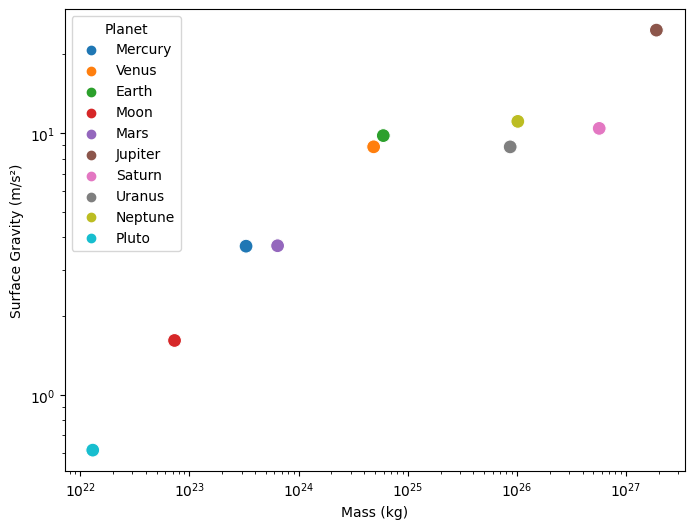

In [182]:
plt.figure(figsize=(8,6))

sns.scatterplot(data = df, x = "Mass_value", y = "Surface_Gravity_value", hue = "Planet", s = 100)

plt.xscale('log')
plt.yscale('log')

plt.xlabel("Mass (kg)")
plt.ylabel("Surface Gravity (m/s²)")
plt.show()


In [183]:
df.to_csv("units.csv", index=False)
